<a href="https://colab.research.google.com/github/kevinpatelco/Stock_Prediction/blob/master/MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage
!pip install --upgrade scikit-learn

  Stored in directory: /root/.cache/pip/wheels/21/9c/02/b7cfae63f7119f4089f229ba1a09ce90fabbaf96199c2890be
Successfully built alpha-vantage
     |████████████████████████████████| 6.7MB 3.4MB/s 
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


# Data Source : Alpha Vantage ---- https://www.alphavantage.co/

In [2]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import pandas as pd
from math import sqrt 

from sklearn import linear_model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.layers import LSTM, SimpleRNN, GRU, concatenate
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


#Data Processing

In [3]:
ts = TimeSeries(key='HE5QFT0CZ49ZBE85', output_format='pandas')

#Add values to SPY_data Variable
SPY_data, SPY_meta_data = ts.get_daily(symbol='SPY', outputsize='full')


#Add values to SPX_data Variable
SPX_data, SPX_meta_data= ts.get_daily(symbol='SPX', outputsize='full')
# pprint(SPY_data)

SPX_weekly_1 = SPX_data[20:-5]
SPX_weekly_2 = SPX_data[15:-10]
SPX_weekly_3 = SPX_data[10:-15]
SPX_data = SPX_data[25:]

(SPX_weekly_1.shape, SPX_weekly_2.shape, SPX_weekly_3.shape, SPX_data.shape)

((4850, 5), (4850, 5), (4850, 5), (4850, 5))

In [4]:
SPX_weekly_1.head(), SPX_weekly_2.head(), SPX_weekly_3.head(), SPX_data.head()

(            1. open  2. high   3. low  4. close     5. volume
 date                                                         
 2000-02-01  1394.46  1412.49  1384.79   1409.28  9.810000e+08
 2000-02-02  1409.28  1420.61  1403.49   1409.12  1.038600e+09
 2000-02-03  1409.12  1425.78  1398.52   1424.97  1.146500e+09
 2000-02-04  1424.97  1435.91  1420.63   1424.37  1.045100e+09
 2000-02-07  1424.37  1427.15  1413.33   1424.24  9.181000e+08,
               1. open    2. high   3. low   4. close     5. volume
 date                                                              
 2000-01-25  1401.5300  1414.2600  1388.49  1410.0300  1.073700e+09
 2000-01-26  1410.0300  1412.7300  1400.16  1404.0900  1.117300e+09
 2000-01-27  1404.0900  1418.8600  1370.99  1398.5601  1.129500e+09
 2000-01-28  1398.5601  1398.5601  1356.20  1360.1600  1.095800e+09
 2000-01-31  1360.1600  1394.4800  1350.14  1394.4600  9.938000e+08,
               1. open    2. high     3. low   4. close     5. volume
 date      

In [0]:
'''Simple Moving Average'''

ti = TechIndicators(key='HE5QFT0CZ49ZBE85', output_format='pandas')

#SPX
spx_sma9 = ti.get_sma(symbol='SPX', interval='daily', time_period=9, series_type='close')
spx_sma13 = ti.get_sma(symbol='SPX', interval='daily', time_period=13, series_type='close')
spx_sma50 = ti.get_sma(symbol='SPX', interval='daily', time_period=50, series_type='close')

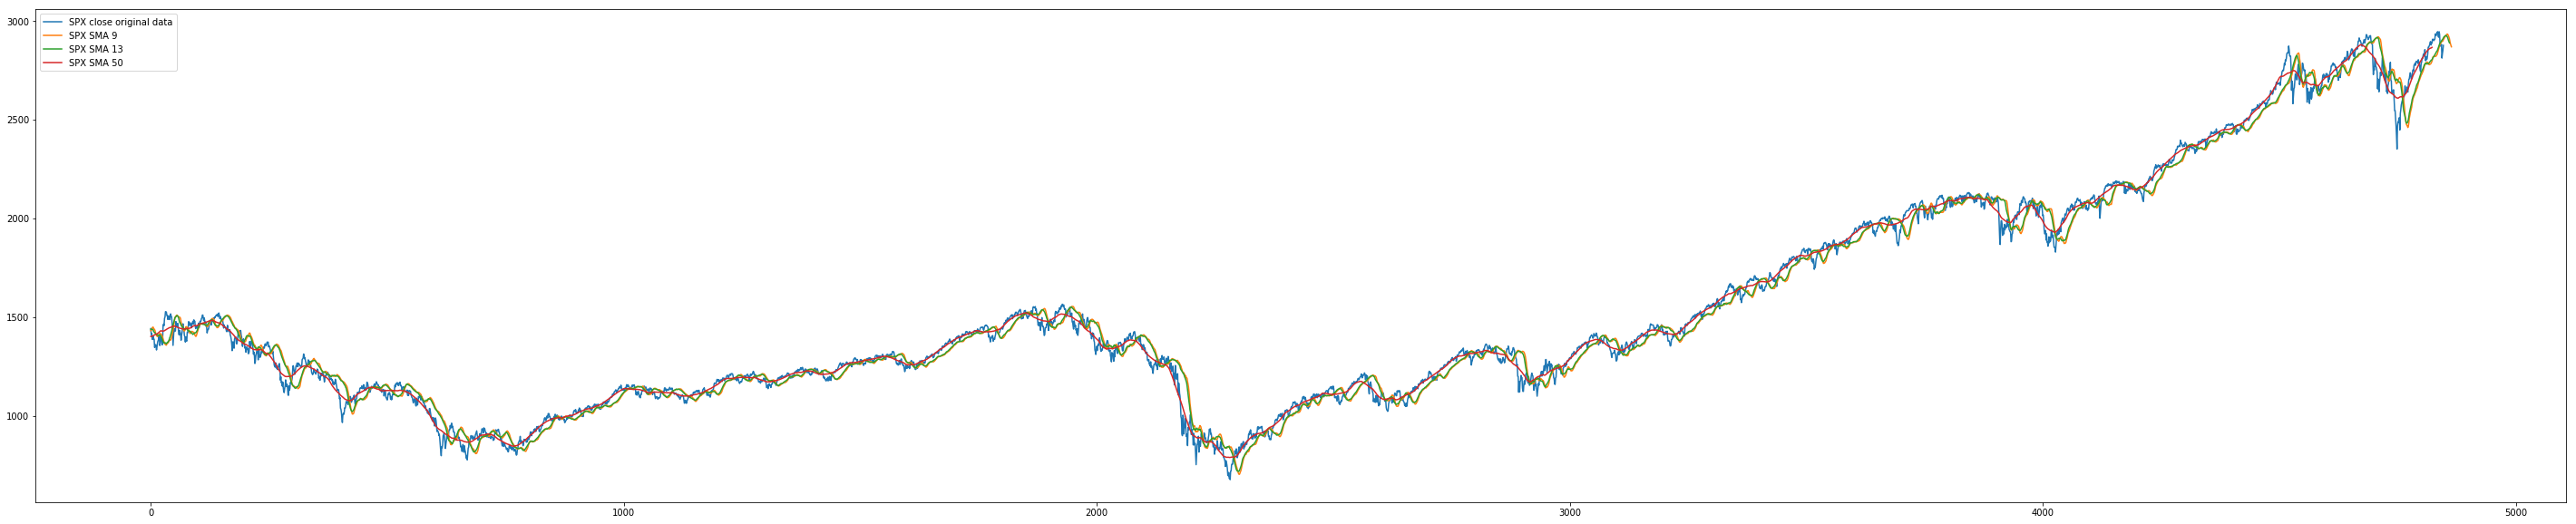

In [5]:
#SPX SMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPX_data['4. close'].values)
plt.plot(spx_sma9[0].values)
plt.plot(spx_sma13[0].values)
plt.plot(spx_sma50[0].values)

plt.legend(['SPX close original data', 'SPX SMA 9', 'SPX SMA 13', 'SPX SMA 50'])

In [0]:
#SPY
spy_sma9 = ti.get_sma(symbol='SPY', interval='daily', time_period=9, series_type='close')
spy_sma13 = ti.get_sma(symbol='SPY', interval='daily', time_period=13, series_type='close')
spy_sma50 = ti.get_sma(symbol='SPY', interval='daily', time_period=50, series_type='close')

In [0]:
#SPY SMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPY_data['4. close'].values)
plt.plot(spy_sma9[0].values)
plt.plot(spy_sma13[0].values)
plt.plot(spy_sma50[0].values)

plt.legend(['SPY close original data', 'SPY SMA 9', 'SPY SMA 13', 'SPY SMA 50'])

By looking at the graphs we can see that, SMA 50 line would be the first one to show an uptrend or a downtrend as it shows the deviation before any other MA lines.

In [0]:
'''Exponential Moving Average'''

#SPX
spx_ema9 = ti.get_ema(symbol='SPX', interval='daily', time_period=9, series_type='close')
spx_ema13 = ti.get_ema(symbol='SPX', interval='daily', time_period=13, series_type='close')
spx_ema50 = ti.get_ema(symbol='SPX', interval='daily', time_period=50, series_type='close')

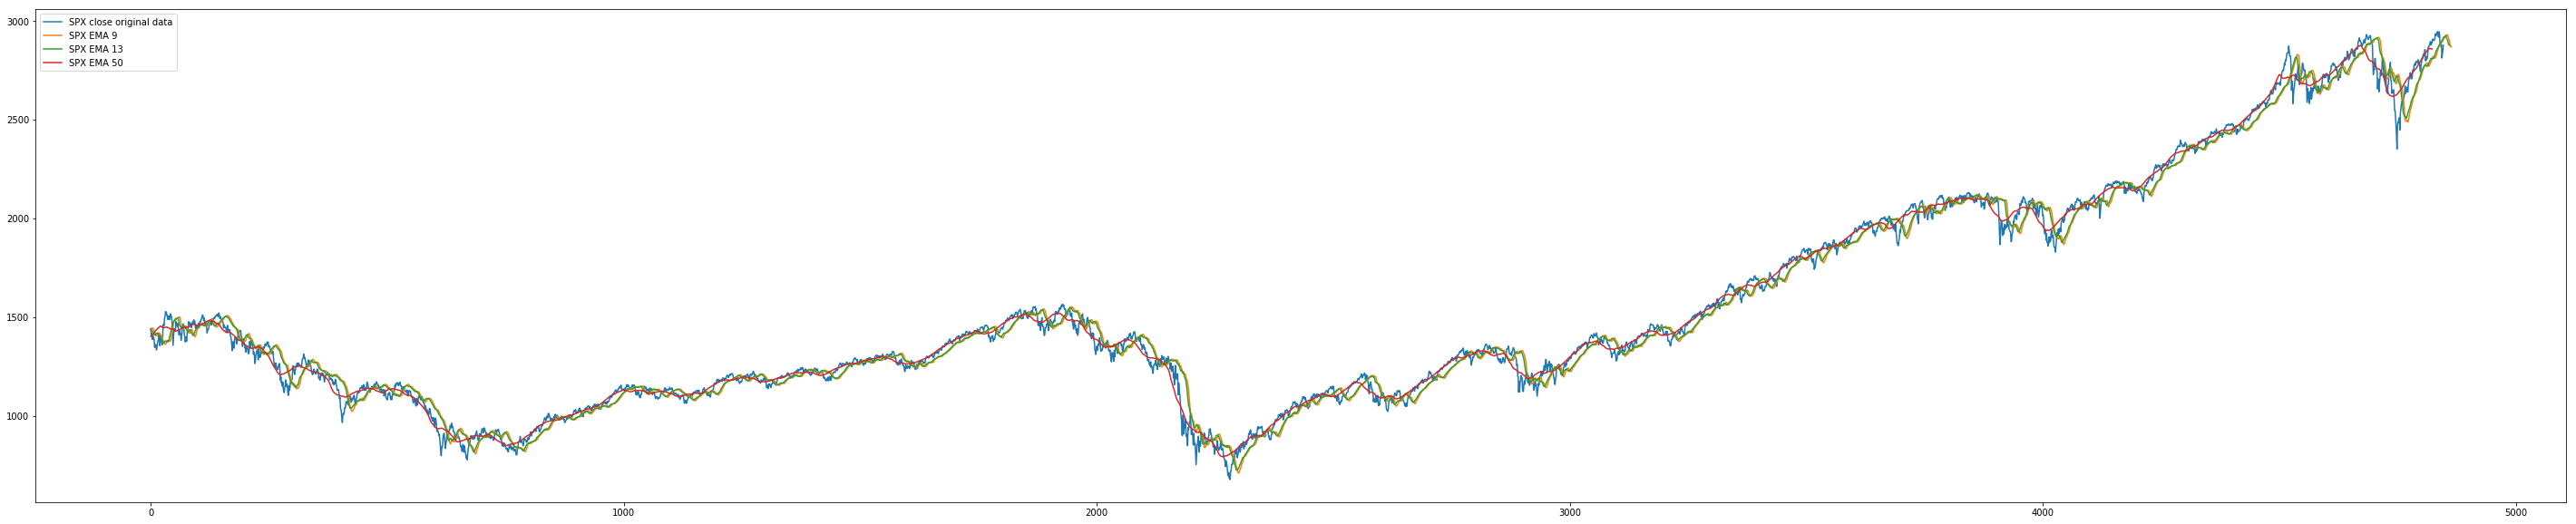

In [7]:
#SPX EMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPX_data['4. close'].values)
plt.plot(spx_ema9[0].values)
plt.plot(spx_ema13[0].values)
plt.plot(spx_ema50[0].values)

plt.legend(['SPX close original data', 'SPX EMA 9', 'SPX EMA 13', 'SPX EMA 50'])

In [0]:
#SPY
spy_ema9 = ti.get_ema(symbol='SPY', interval='daily', time_period=9, series_type='close')
spy_ema13 = ti.get_ema(symbol='SPY', interval='daily', time_period=13, series_type='close')
spy_ema50 = ti.get_ema(symbol='SPY', interval='daily', time_period=50, series_type='close')

In [0]:
#SPY EMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPY_data['4. close'].values)
plt.plot(spy_ema9[0].values)
plt.plot(spy_ema13[0].values)
plt.plot(spy_ema50[0].values)

plt.legend(['SPY close original data', 'SPY EMA 9', 'SPY EMA 13', 'SPY EMA 50'])

In [0]:
# df = SPX_data[['4. close']]
df = SPX_data
forecast_out = int(1)

df['prediction'] = df[['4. close']].shift(-forecast_out)


In [11]:
X = np.array(df.drop(['prediction'],1))
X = preprocessing.scale(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [0]:
y = np.array(df['prediction'])
y = y[:-forecast_out]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Regression Models


##Linear Regression

In [15]:
# Training - linear regression
reg = linear_model.LinearRegression()
# reg = linear_model.Ridge(alpha = 0.1)
reg.fit(X_train,y_train)

# Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9991245617498664


In [16]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

[2876.41252311]


##Support Vector Regression

In [17]:
#Training - SVR
reg = svm.SVR(kernel='linear', gamma='scale', C=1.0, epsilon=0.1)
reg.fit(X_train, y_train)

#TESTING
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9989793640468646


In [0]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

##KNN Regressor

In [18]:
#Training - KNN
reg = neigh = KNeighborsRegressor(n_neighbors=9)
reg.fit(X_train, y_train)

#Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9985333555808307


In [0]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

##Random Forest Regressor

In [19]:
#Training - Random Forest Regressor
reg = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
reg.fit(X_train, y_train)

#Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9430414842430401


In [0]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

In [0]:
X_train.shape

#Neural Network Regression

##RNN - LSTM

In [0]:
# df = SPX_data[['4. close']]
df = SPX_data
# forecast_out = int(1)

# df['prediction'] = df[['4. close']].shift(-forecast_out)
# df
df_weekly_1 = SPX_weekly_1
df_weekly_2 = SPX_weekly_2
df_weekly_3 = SPX_weekly_3

In [6]:
df.tail(), df_weekly_1.tail(), df_weekly_2.tail(), df_weekly_3.tail()

(              1. open    2. high     3. low   4. close     5. volume
 date                                                                
 2019-05-14  2820.1201  2852.5400  2820.1201  2834.4099  3.322720e+09
 2019-05-15  2820.3799  2858.6799  2815.0801  2850.9600  3.125950e+09
 2019-05-16  2855.8000  2892.1499  2855.8000  2876.3201  3.338060e+09
 2019-05-17  2858.6001  2885.4800  2854.2300  2859.5300  3.257950e+09
 2019-05-20  2841.9399  2853.8601  2831.2900  2840.2300  3.288870e+09,
               1. open    2. high     3. low   4. close     5. volume
 date                                                                
 2019-05-07  2913.0300  2913.0300  2862.6001  2884.0500  3.767100e+09
 2019-05-08  2879.6101  2897.9600  2873.2800  2879.4199  3.485790e+09
 2019-05-09  2859.8401  2875.9700  2836.3999  2870.7200  3.638820e+09
 2019-05-10  2863.1001  2891.3101  2825.3899  2881.3999  3.529600e+09
 2019-05-13  2840.1899  2840.1899  2801.4299  2811.8701  3.894030e+09,
               1. 

In [7]:
scl = preprocessing.MinMaxScaler()

#Scale the daily data
df = df.values #["4. close"]
df = df.reshape(df.shape[0],5)
df = scl.fit_transform(df)

# scale one week before data
df_weekly_1 = df_weekly_1.values
df_weekly_1 = df_weekly_1.reshape(df_weekly_1.shape[0], 5)
df_weekly_1 = scl.fit_transform(df_weekly_1)

# scale two weeks before data
df_weekly_2 = df_weekly_2.values
df_weekly_2 = df_weekly_2.reshape(df_weekly_2.shape[0], 5)
df_weekly_2 = scl.fit_transform(df_weekly_2)

# scale three weeks before data
df_weekly_3 = df_weekly_3.values
df_weekly_3 = df_weekly_3.reshape(df_weekly_3.shape[0], 5)
df_weekly_3 = scl.fit_transform(df_weekly_3)

(df, df_weekly_1, df_weekly_2, df_weekly_3)

(array([[0.32773585, 0.33050301, 0.33330252, 0.33719207, 0.06230811],
        [0.33542595, 0.33170716, 0.32776251, 0.32396773, 0.06256036],
        [0.32221903, 0.32176852, 0.32546558, 0.32622393, 0.0633081 ],
        ...,
        [0.95753279, 0.97256138, 0.96323525, 0.96936941, 0.26864388],
        [0.95876466, 0.96960861, 0.9625444 , 0.96197061, 0.26142686],
        [0.95143521, 0.95561044, 0.95245006, 0.95346578, 0.26421241]]),
 array([[0.31463451, 0.31751416, 0.31594324, 0.32289691, 0.05629919],
        [0.32115438, 0.32110889, 0.32417184, 0.32282641, 0.0614883 ],
        [0.32108399, 0.32339766, 0.32198488, 0.32981094, 0.07120888],
        ...,
        [0.95931018, 0.96539852, 0.95469858, 0.96690165, 0.29573898],
        [0.96074438, 0.9721896 , 0.94985382, 0.9716079 , 0.28589948],
        [0.95066532, 0.94955862, 0.93931065, 0.94096858, 0.31873054]]),
 array([[0.31774487, 0.31829774, 0.31757136, 0.32322741, 0.06465042],
        [0.32148434, 0.31762041, 0.32270654, 0.32060987, 0.0

In [0]:
##Daily Data

#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    feature = data[:, [3]]
    data = data[:, [0,1,2,4]]
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),:])
        Y.append(feature[(i+lb),0])
    return np.array(X),np.array(Y)
  
# X, y = processData(df, 30)
X,y = processData(df,7)

#Divide into train and test data
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]


##One week before data

#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    feature = data[:, [3]]
    data = data[:, [0,1,2,4]]
    X_weekly_1,Y_weekly_1 = [],[]
    for i in range(len(data)-lb-1):
        X_weekly_1.append(data[i:(i+lb),:])
        Y_weekly_1.append(feature[(i+lb),0])
    return np.array(X_weekly_1),np.array(Y_weekly_1)
  
# X, y = processData(df, 30)
X_weekly_1,y_weekly_1 = processData(df_weekly_1,7)

#Divide into train and test data
X_weekly1_train,X_weekly1_test = X_weekly_1[:int(X_weekly_1.shape[0]*0.80)],X_weekly_1[int(X_weekly_1.shape[0]*0.80):]
y_weekly1_train,y_weekly1_test = y_weekly_1[:int(y_weekly_1.shape[0]*0.80)],y_weekly_1[int(y_weekly_1.shape[0]*0.80):]

##Two weeks before data

#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    feature = data[:, [3]]
    data = data[:, [0,1,2,4]]
    X_weekly_2,Y_weekly_2 = [],[]
    for i in range(len(data)-lb-1):
        X_weekly_2.append(data[i:(i+lb),:])
        Y_weekly_2.append(feature[(i+lb),0])
    return np.array(X_weekly_2),np.array(Y_weekly_2)
  
# X, y = processData(df, 30)
X_weekly_2,y_weekly_2 = processData(df_weekly_2,7)

#Divide into train and test data
X_weekly2_train,X_weekly2_test = X_weekly_2[:int(X_weekly_2.shape[0]*0.80)],X_weekly_2[int(X_weekly_2.shape[0]*0.80):]
y_weekly2_train,y_weekly2_test = y_weekly_2[:int(y_weekly_2.shape[0]*0.80)],y_weekly_2[int(y_weekly_2.shape[0]*0.80):]

##Three weeks before data

#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    feature = data[:, [3]]
    data = data[:, [0,1,2,4]]
    X_weekly_3,Y_weekly_3 = [],[]
    for i in range(len(data)-lb-1):
        X_weekly_3.append(data[i:(i+lb),:])
        Y_weekly_3.append(feature[(i+lb),0])
    return np.array(X_weekly_3),np.array(Y_weekly_3)
  
# X, y = processData(df, 30)
X_weekly_3,y_weekly_3 = processData(df_weekly_3,7)

#Divide into train and test data
X_weekly3_train,X_weekly3_test = X_weekly_3[:int(X_weekly_3.shape[0]*0.80)],X_weekly_3[int(X_weekly_3.shape[0]*0.80):]
y_weekly3_train,y_weekly3_test = y_weekly_3[:int(y_weekly_3.shape[0]*0.80)],y_weekly_3[int(y_weekly_3.shape[0]*0.80):]



In [9]:
X_train.shape, X_weekly1_train.shape, X_weekly2_train.shape, X_weekly3_train.shape

((3873, 7, 4), (3873, 7, 4), (3873, 7, 4), (3873, 7, 4))

In [10]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],4))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],4))

X_weekly1_train = X_weekly1_train.reshape((X_weekly1_train.shape[0],X_weekly1_train.shape[1],4))
X_weekly1_test = X_weekly1_test.reshape((X_weekly1_test.shape[0],X_weekly1_test.shape[1],4))

X_weekly2_train = X_weekly2_train.reshape((X_weekly2_train.shape[0],X_weekly2_train.shape[1],4))
X_weekly2_test = X_weekly2_test.reshape((X_weekly2_test.shape[0],X_weekly2_test.shape[1],4))

X_weekly3_train = X_weekly3_train.reshape((X_weekly3_train.shape[0],X_weekly3_train.shape[1],4))
X_weekly3_test = X_weekly3_test.reshape((X_weekly3_test.shape[0],X_weekly3_test.shape[1],4))


#Build the model
model = Sequential()

#first input model
visible1 = Input(shape=(7,4))
LSTM11 = LSTM(100, return_sequences=True)(visible1)
LSTM12 = LSTM(100)(LSTM11)
# LSTM13 = LSTM(100, return_sequences=True)(LSTM12)
# LSTM14 = LSTM(100)(LSTM13)

#second input model
visible2 = Input(shape=(7,4))
LSTM21 = LSTM(100, return_sequences=True)(visible2)
LSTM22 = LSTM(100)(LSTM21)
# LSTM23 = LSTM(100, return_sequences=True)(LSTM22)
# LSTM24 = LSTM(100)(LSTM23)

#Third input model
visible3 = Input(shape=(7,4))
LSTM31 = LSTM(100, return_sequences=True)(visible3)
LSTM32 = LSTM(100)(LSTM31)
# LSTM33 = LSTM(100, return_sequences=True)(LSTM32)
# LSTM34 = LSTM(100)(LSTM33)

#Fourth input model
visible4 = Input(shape=(7,4))
LSTM41 = LSTM(100, return_sequences=True)(visible4)
LSTM42 = LSTM(100)(LSTM41)
# LSTM33 = LSTM(100, return_sequences=True)(LSTM32)
# LSTM34 = LSTM(100)(LSTM33)

#merge both input models
merge = concatenate([LSTM12, LSTM22, LSTM32, LSTM42])

#interpretation layer 
hidden11 = Dense(50, activation= 'relu')(merge)
hidden12 = Dense(25, activation= 'relu')(hidden11)
hidden13 = Dense(10, activation= 'relu')(hidden12)
output = Dense(1)(hidden13)

model = Model(inputs=[visible1, visible2, visible3, visible4], outputs=output)
# model.add(LSTM(units = 100, input_shape=(7,4), return_sequences=True))

# model.add(LSTM(units = 100, input_shape=(7,4), return_sequences=True))

# model.add(LSTM(units = 100, input_shape=(7,4), return_sequences=True))

# model.add(LSTM(units = 100, input_shape=(7,4)))

# layer1 = LSTM(units = 1024, input_shape=(7,5))
# output = layer1(input)

# model.add()
# # model.add(Dense(64))
# model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

# #Fit model with history to check for overfitting
history = model.fit([X_train, X_weekly1_train, X_weekly2_train, X_weekly3_train], y_train, epochs=100 , validation_data=([X_test, X_weekly1_test, X_weekly2_test, X_weekly3_test], y_test))
# history = model.fit([X_train, X_weekly_t'rain],y_train, epochs=100 , validation_data=([X_test, X_weekly_test],y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3873 samples, validate on 969 samples
Epoch 1/100
3873/3873 [==============================] - 15s 4ms/step - loss: 0.0048 - val_loss: 7.0707e-04
Epoch 2/100
3873/3873 [==============================] - 9s 2ms/step - loss: 2.6805e-04 - val_loss: 0.0023
Epoch 3/100
3873/3873 [==============================] - 9s 2ms/step - loss: 2.1583e-04 - val_loss: 0.0012
Epoch 4/100
3873/3873 [==============================] - 9s 2ms/step - loss: 1.9099e-04 - val_loss: 7.1155e-04
Epoch 5/100
3873/3873 [==============================] - 9s 2ms/step - loss: 1.7685e-04 - val_loss: 0.0015
Epoch 6/100
3873/3873 [==============================] - 9s 2ms/step - loss: 1.6385e-04 - val_loss: 5.3462e-04
Epoch 7/100
3873/3873 [==============================] - 9s 2ms/step - loss: 1.7213e-04 - val_loss: 0.0033
Epoch 8/100
3873/3873 [==============================] - 9s 2ms/step - loss

In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 7, 4)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 7, 4)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 7, 4)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 7, 4)         0                                            
__________________________________________________________________________________________________
lstm_1 (LS

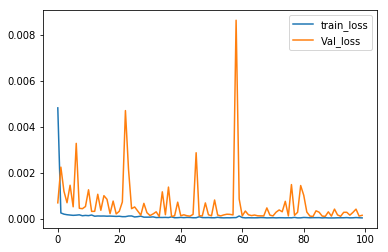

In [12]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()

In [0]:
Xt = model.predict([X_test, X_weekly1_test, X_weekly2_test, X_weekly3_test ])
Xt = Xt.ravel()
testPredict_extended = np.zeros((len(Xt),5))
testPredict_extended[:, 3] = Xt
testPredict = scl.inverse_transform(testPredict_extended)[:, 3]

y_test_extended = np.zeros((len(y_test),5))
y_test_extended[:, 3] = y_test 
y_test = scl.inverse_transform(y_test_extended)[:,3]



# y_test
# scl.inverse_transform(y_test)[3]
# scl.inverse_transform(Xt)

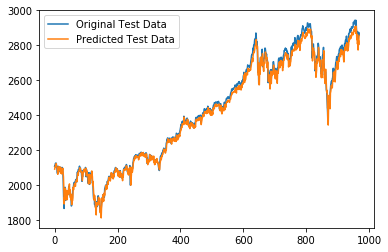

In [14]:
plt.plot(y_test, label='Original Test Data')
plt.plot(testPredict, label='Predicted Test Data')
plt.legend()
plt.show()

In [34]:
rms = sqrt(mean_squared_error(y_test, testPredict))

y = SPX_data[['4. close']]

nrms = rms/np.mean(y)
nrms

4. close    0.019029
dtype: float64

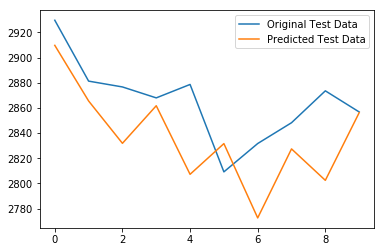

In [37]:
# Prediction Values for last 10 Days
plt.plot(y_test[-10:], label='Original Test Data')
plt.plot(testPredict[-10:], label='Predicted Test Data')
plt.legend()
plt.show()